In [2]:
# @author :Ayush Shyam Kumar
import numpy as np #importing numpy for ndarray operation
import matplotlib.pyplot as plt #importing matplotlib for data plotting

In [2]:
def randomDatapoint(k,data): #A method to select K random initial centeroids from the 2-D Data set
        if(k<data.shape[0]): #k value should be less than our total data points
            index = np.random.choice(data.shape[0], k, replace=False) #Randomly indices choosing k initial centeroids from initial data
            Kdatapoints = data[index] 
            return Kdatapoints #return k random initial centeroids from sata set
        else:
            raise Exception("Kvalue greater than data size!, Try a smaller number") #throwing an eception if k is greater than data length

In [3]:
def EuclideanDistance(x,y): #A method to measure eucledian distance.
    sum = 0;
    for i in range(len(x)): 
        sum += np.power(x[i]-y[i], 2); #Square of the co-ordinates
    return np.sqrt(sum) # returning the distance

In [4]:
def clusterCreate(centeroids,dataWithLabels): #A method to create cluster by labelling them based on distance from K-centeroids
    mindist=[] #A temporary list to hold minimum distance from the centeroids
    for i in range(dataWithLabels.shape[0]): #iterating through all rows of data
        for j in range(centeroids.shape[0]): #iterating through all rows of centeroids
            mindist.append(EuclideanDistance(dataWithLabels[i],centeroids[j])) #list appeneded with distance for each point of data
        dataWithLabels[i,dataWithLabels.shape[1]-1]=mindist.index(min(mindist)) #extracting the minimum sidtance and labelling them
        mindist.clear() #clearing the list for next iteration
    return dataWithLabels

In [5]:
def KMeans(centeroids,labelleddata,k): #Means method to compute the new centeroid and classify the data based on it by labelling them
    #Calling Clustering Method to implement the clustering algorithm
    dataWithlabels=clusterCreate(centeroids,labelleddata)
    newdata=dataWithlabels[:,0:dataWithlabels.shape[1]-1]
    labels=np.array(dataWithlabels[:,dataWithlabels.shape[1]-1]) #data retrieved back without the labels
    centers_new=np.zeros((k,newdata.shape[1])) #New centeroids declared
    for i in range(k):
        centers_new[i]=np.mean(newdata[labels==i],axis=0) #Computing the new mean centeroid location
    return centers_new,dataWithlabels

In [27]:
def main():
    #Creating random data set for kmeans clustering
    c1=np.array([1,1])
    c2=np.array([6,5])
    c3=np.array([10,9])
    c=np.array([c1,c2,c3])
    X1=np.random.randn(200,2)+c1
    X2=np.random.randn(200,2)+c2
    X3=np.random.randn(200,2)+c3
    X=np.concatenate((X1,X2,X3))
    data=X #Data Set
    #Plotting data before clustering
    plt.scatter(data[:,0],data[:,1]);
    plt.xlabel("x-axis")
    plt.ylabel("y-axis")
    plt.title("Sample Data Set")
    plt.figure()
    
    k=int(input("Enter K value for kmeans clustering : ")) #Kmeans k value
    dataAddlabel=np.hstack((data, np.atleast_2d(np.zeros(data.shape[0])).T)) #Appending zeros column to Data array for labels
    random_centeroids=randomDatapoint(k,dataAddlabel) #Calling random data point method to get 3 random data points as initial centeroids
    
    #Plotting Initial Cluster Centeroids
    rgb =np.random.rand(k,3)
    plt.scatter(data[:,0],data[:,1],label="Data Points")
    plt.xlabel("x-axis")
    plt.ylabel("y-axis")
    plt.title("Initial Centeroids")
    plt.scatter(random_centeroids[:,0],random_centeroids[:,1],c=rgb,s=100,label="Initial Centeroid")
    plt.legend()
    
    #Looping the means process till there is no further update in the centeroids
    centers_new,datawithlabels=KMeans(random_centeroids,dataAddlabel,k) #First call for computing the mean centeroid
    centers_old=np.zeros(centers_new.shape) 
    error=np.linalg.norm(centers_old-centers_new) #declaring error variable to tarck unchange in centeroids
    while error!=0: #itterating till the error is not equal to zero
        centers_old=centers_new #tracking the previous value of centeroid.
        centers_new,datawithlabels=KMeans(random_centeroids,datawithlabels,k)
        error=np.linalg.norm(centers_new-centers_old) #updating error decrement
    final_centeroids=centers_new 
    final_data=datawithlabels[:,0:datawithlabels.shape[1]-1]
    final_labels=datawithlabels[:,datawithlabels.shape[1]-1]
    
    #plotting the final output
    plt.figure()
    plt.scatter(final_data[:,0],final_data[:,1],c=final_labels,label="Data Points")
    plt.xlabel("x-axis data")
    plt.ylabel("y-axis data")
    plt.title("Clustered Data")
    plt.scatter(final_centeroids[:,0],final_centeroids[:,1],c=rgb,s=150,marker='s',label="Final Centeroids")
    plt.scatter(random_centeroids[:,0],random_centeroids[:,1],s=300,marker='x',c='red',label="Initial Centeroids")   
    plt.legend() 

Enter K value for kmeans clustering : 4


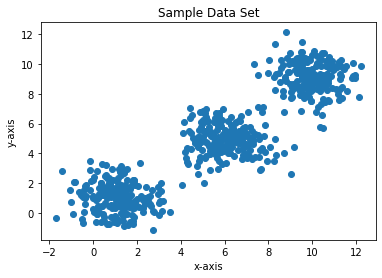

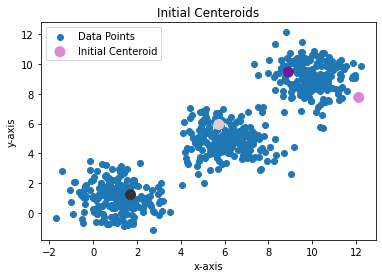

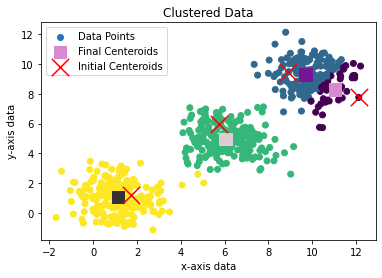

In [32]:
if __name__=="__main__":
    main()